In [10]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

## generate data

In [3]:
genes = ["gene" + str(i) for i in range(1, 101)]

wt = ["wt" + str(i) for i in range(1, 6)]
ko = ["ko" + str(i) for i in range(1, 6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

In [4]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,658,621,638,632,636,260,292,307,256,294
gene2,230,243,226,202,217,603,663,692,675,682
gene3,616,595,635,578,616,849,916,893,929,868
gene4,413,385,438,423,435,655,590,640,603,590
gene5,336,356,345,326,336,358,363,369,380,377


In [5]:
data.shape

(100, 10)

## scaling and centering data

In [6]:
# data.T tranposes the data. Necessary due to sklearn expects samples in rows
# but here the samples are in columns
scaled_data = preprocessing.StandardScaler().fit_transform(data.T)

## create pca object

In [7]:
pca = PCA()
pca.fit(scaled_data)  # here the math happens
pca_data = pca.transform(scaled_data)  # generate coordinates for pca graph

## draw scree plot

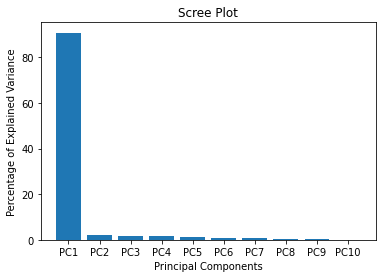

In [11]:
# calculate percantage of variation each pc accounts for
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

## draw pca plot

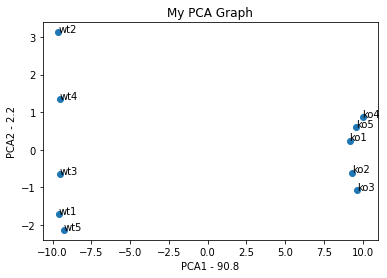

In [12]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel(f'PCA1 - {per_var[0]}')
plt.ylabel(f'PCA2 - {per_var[1]}')

# adds sample names for thr graph
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

## examine loading scores

In [13]:
# pc's are 0 indexed, so pc1=0 
loading_scores = pd.Series(pca.components_[0], index=genes)

sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10_genes = sorted_loading_scores[0:10].index.values

loading_scores[top_10_genes]

gene14   -0.104909
gene8    -0.104906
gene60    0.104883
gene16   -0.104879
gene70    0.104845
gene46   -0.104840
gene28   -0.104840
gene87    0.104831
gene34    0.104820
gene36   -0.104817
dtype: float64